In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from functions import av_err, savetocsv, allthewayup
import scipy as sp
from scipy import stats

In [10]:
data = pd.read_csv("Data/LYSO/Na22/LYSO_Na22_final.csv", 
                   nrows = 5000
                  )

Text(0.5, 1.0, 'Counts Recorded per Channel')

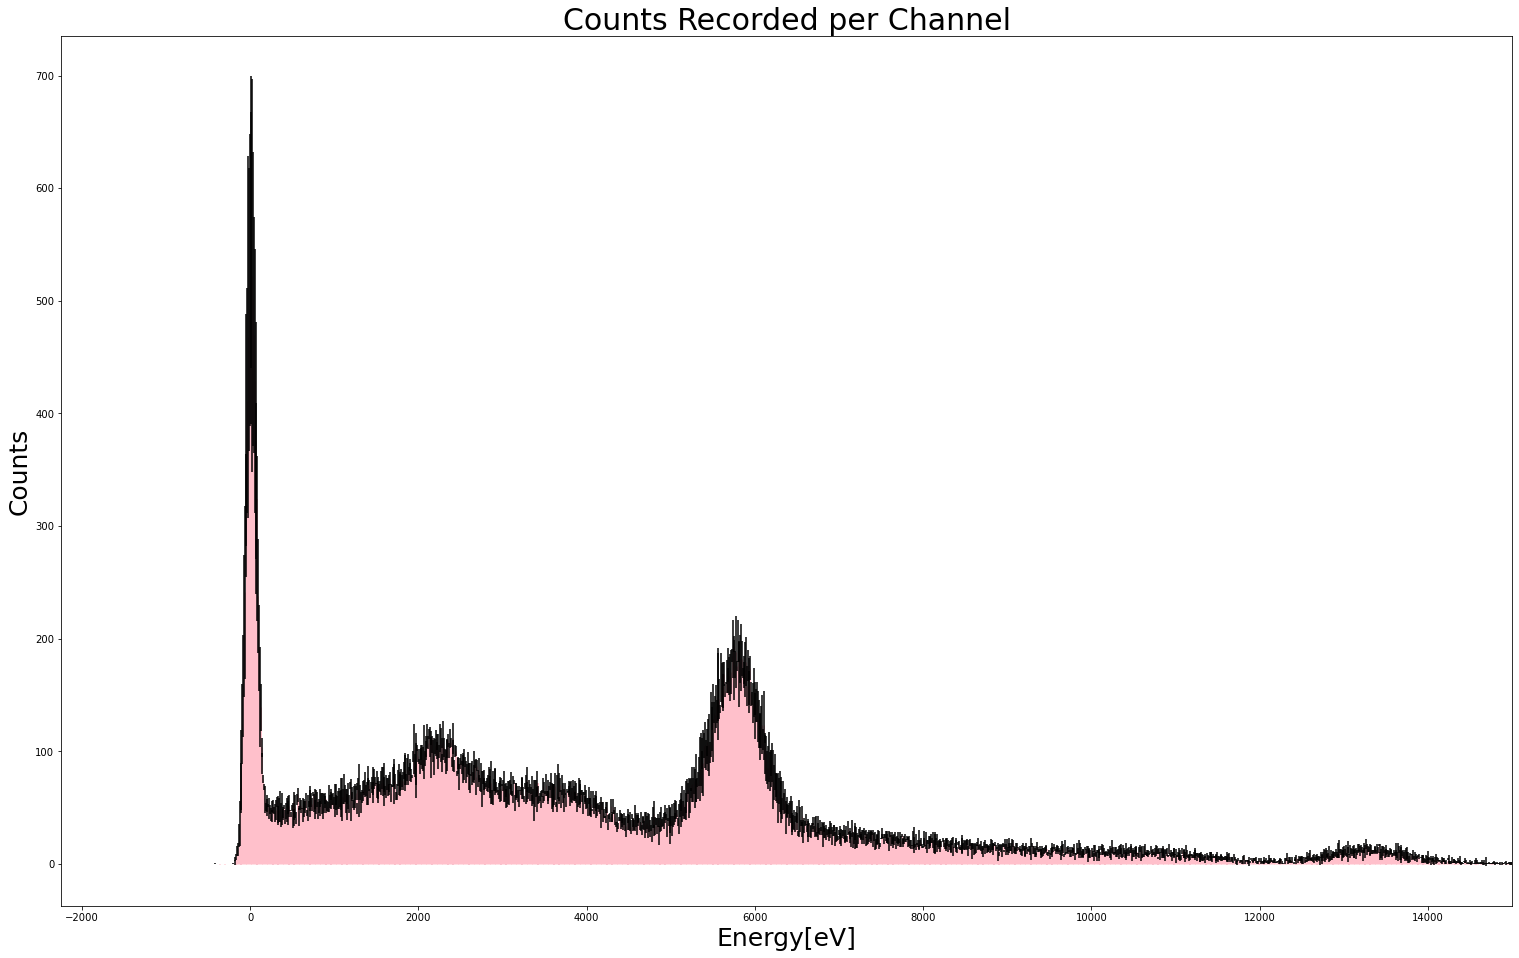

In [11]:
fig, ax = plt.subplots(figsize = (26,16))

# barplotting because it feels better than a histogram
ax.bar(x = data['ADC channel'], height = data['average'], width = 0.8, ec = 'pink', yerr = data['error'])
ax.set_xlim(xmax = 15000)

plt.xlabel('Energy[eV]', fontsize = 25)
plt.ylabel('Counts', fontsize = 25)
plt.title('Counts Recorded per Channel', fontsize = 30)

In [4]:
# in this one we wish to plot the ADC channel and energy levels for peaks of each source to find a converion ratio

B_Am241 = pd.read_csv('Data/BGO/Am241/BGO_Am241_final.csv')
B_Ba133 = pd.read_csv('Data/BGO/Ba133/BGO_Ba133_final.csv')
B_Co60 = pd.read_csv('Data/BGO/Co60/BGO_C060_final.csv')
B_Cs137 = pd.read_csv('Data/BGO/Cs137/BGO_Cs137_final.csv')
B_Na22 = pd.read_csv('Data/BGO/Na22/BGO_Na22_final.csv')

C_Am241 = pd.read_csv('Data/CSI/Am241/CSI_Am241_final.csv')
C_Ba133 = pd.read_csv('Data/CSI/Ba133/CSI_Ba133_final.csv')
C_Co60 = pd.read_csv('Data/CSI/Co60/CSI_Co60_final.csv')
C_Cs137 = pd.read_csv('Data/CSI/Cs137/CSI_Cs137_final.csv')
C_Na22 = pd.read_csv('Data/CSI/Na22/CSI_Na22_final.csv')

L_Am241 = pd.read_csv('Data/LYSO/Am241/LYSO_Am241_final.csv')
L_Ba133 = pd.read_csv('Data/LYSO/Ba133/LYSO_Ba133_final.csv')
L_Co60 = pd.read_csv('Data/LYSO/Co60/LYSO_Co60_final.csv')
L_Cs137 = pd.read_csv('Data/LYSO/Cs137/LYSO_Cs137_final.csv')
L_Na22 = pd.read_csv('Data/LYSO/Na22/LYSO_Na22_final.csv')

[59540.0, 17700.0, 31000, 79000, 1173200.0, 1332500.0, 32000, 661700.0]

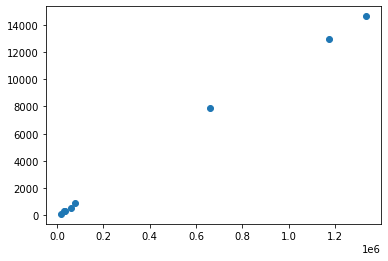

In [92]:
L_Am = allthewayup(L_Am241, 59.54*10**3, 17.7*10**3, 1)
L_Ba = allthewayup(L_Ba133, 31*10**3, 79*10**3, 0, 500)
L_Co = allthewayup(L_Co60, 1173.2*10**3, 1332.5*10**3, 0, 2000, 1)
L_Cs = allthewayup(L_Cs137, 32*10**3, 661.7*10**3,0, 4000)
L_Na = allthewayup(L_Na22, 511*10**3, 1274.5*10**3, 0, 4000)
L_plot_x = [
    L_Am['peak1']['energy'], L_Am['peak2']['energy'],
           L_Ba['peak1']['energy'], L_Ba['peak2']['energy'],
            L_Co['peak1']['energy'], L_Co['peak2']['energy'],
            L_Cs['peak1']['energy'], L_Cs['peak2']['energy'],
#             L_Na['peak1']['energy'], L_Na['peak2']['energy']
           ]

L_plot_y = [
    L_Am['peak1']['channel'], L_Am['peak2']['channel'],
           L_Ba['peak1']['channel'], L_Ba['peak2']['channel'],
            L_Co['peak1']['channel'], L_Co['peak2']['channel'],
            L_Cs['peak1']['channel'], L_Cs['peak2']['channel'],
#             L_Na['peak1']['channel'], L_Na['peak2']['channel']
           ]
plt.scatter(L_plot_x, L_plot_y)
L_plot_x

In [49]:
reg = sp.stats.linregress(L_plot_y, L_plot_x)

In [93]:
def retrouvezvous(data1, data2, data3, data4, data5):
    peaks1 = allthewayup(data1, 59.54*10**3, 17.7*10**3, 1)
    peaks2 = allthewayup(data2, 31*10**3, 79*10**3, 0, 500)
    peaks3 = allthewayup(data3, 1173.2*10**3, 1332.5*10**3, 0, 2000, 1)
    peaks4 = allthewayup(data4, 32*10**3, 661.7*10**3,0, 4000)
    peaks5 = allthewayup(data5, 511*10**3, 1274.5*10**3, 0, 4000)
    
    L_plot_x = [peaks1['peak1']['energy'], peaks1['peak2']['energy'],
           peaks2['peak1']['energy'], peaks2['peak2']['energy'],
            peaks3['peak1']['energy'], peaks3['peak2']['energy'],
            peaks4['peak1']['energy'], peaks4['peak2']['energy'],
#             peaks5['peak1']['energy'], peaks5['peak2']['energy']
           ]
    L_plot_y = [peaks1['peak1']['channel'], peaks1['peak2']['channel'],
           peaks2['peak1']['channel'], peaks2['peak2']['channel'],
            peaks3['peak1']['channel'], peaks3['peak2']['channel'],
            peaks4['peak1']['channel'], peaks4['peak2']['channel'],
#             peaks5['peak1']['channel'], peaks5['peak2']['channel']
           ]
    reg = sp.stats.linregress(L_plot_y,L_plot_x)
    
    
    data1['energy'] = data1['ADC channel'].apply(lambda x: x*reg.slope + reg.intercept)
    data2['energy'] = data2['ADC channel'].apply(lambda x: x*reg.slope + reg.intercept)
    data3['energy'] = data3['ADC channel'].apply(lambda x: x*reg.slope + reg.intercept)
    data4['energy'] = data4['ADC channel'].apply(lambda x: x*reg.slope + reg.intercept)
    data5['energy'] = data5['ADC channel'].apply(lambda x: x*reg.slope + reg.intercept)
    
    data1_sort = data1.sort_values(by=['average'], ascending=False, inplace=False)[['energy']]
    
    
    return data1, data2, data3, data4, data5

In [94]:
(a, b, c, d, e) = retrouvezvous(L_Am241, L_Ba133, L_Co60, L_Cs137, L_Na22)

In [154]:
def peakfind(dataset, islarger, peakwidth = 150, iscobalt = 0):
    df_sort = dataset.sort_values(by=['average'], 
                              ascending=False, inplace=False)[['energy']]
    if iscobalt == 1:
        dp1 = df_sort[df_sort['energy']> 1.1*10**6].iloc[0]
        
        dp2 = df_sort[df_sort['energy'] > peakwidth+1.1*10**6].iloc[0]
    
    elif iscobalt == 0:
        
        dp1 = df_sort.iloc[0]
    
        if islarger == 0:
            dp2 = df_sort[df_sort['energy'] > peakwidth].iloc[0]
        
        elif islarger == 1:
            dp2 = df_sort[df_sort['energy'] < peakwidth].iloc[0]
    
    my_dict = {'peak1': dp1[0], 'peak2': dp2[0]}
    
    
    return my_dict

In [168]:
######
dataframe = b

######
x_min = 0
x_max = 0.5*10**6
crystal = 'LYSO'
source = 'Ba133'


######
energy = dataframe['energy']
average = dataframe['average']
error = dataframe['error']

#####
peaks = peakfind(dataframe, 0, peakwidth = 50000)
peak1 = int(peaks["peak1"])
peak2 = int(peaks["peak2"])

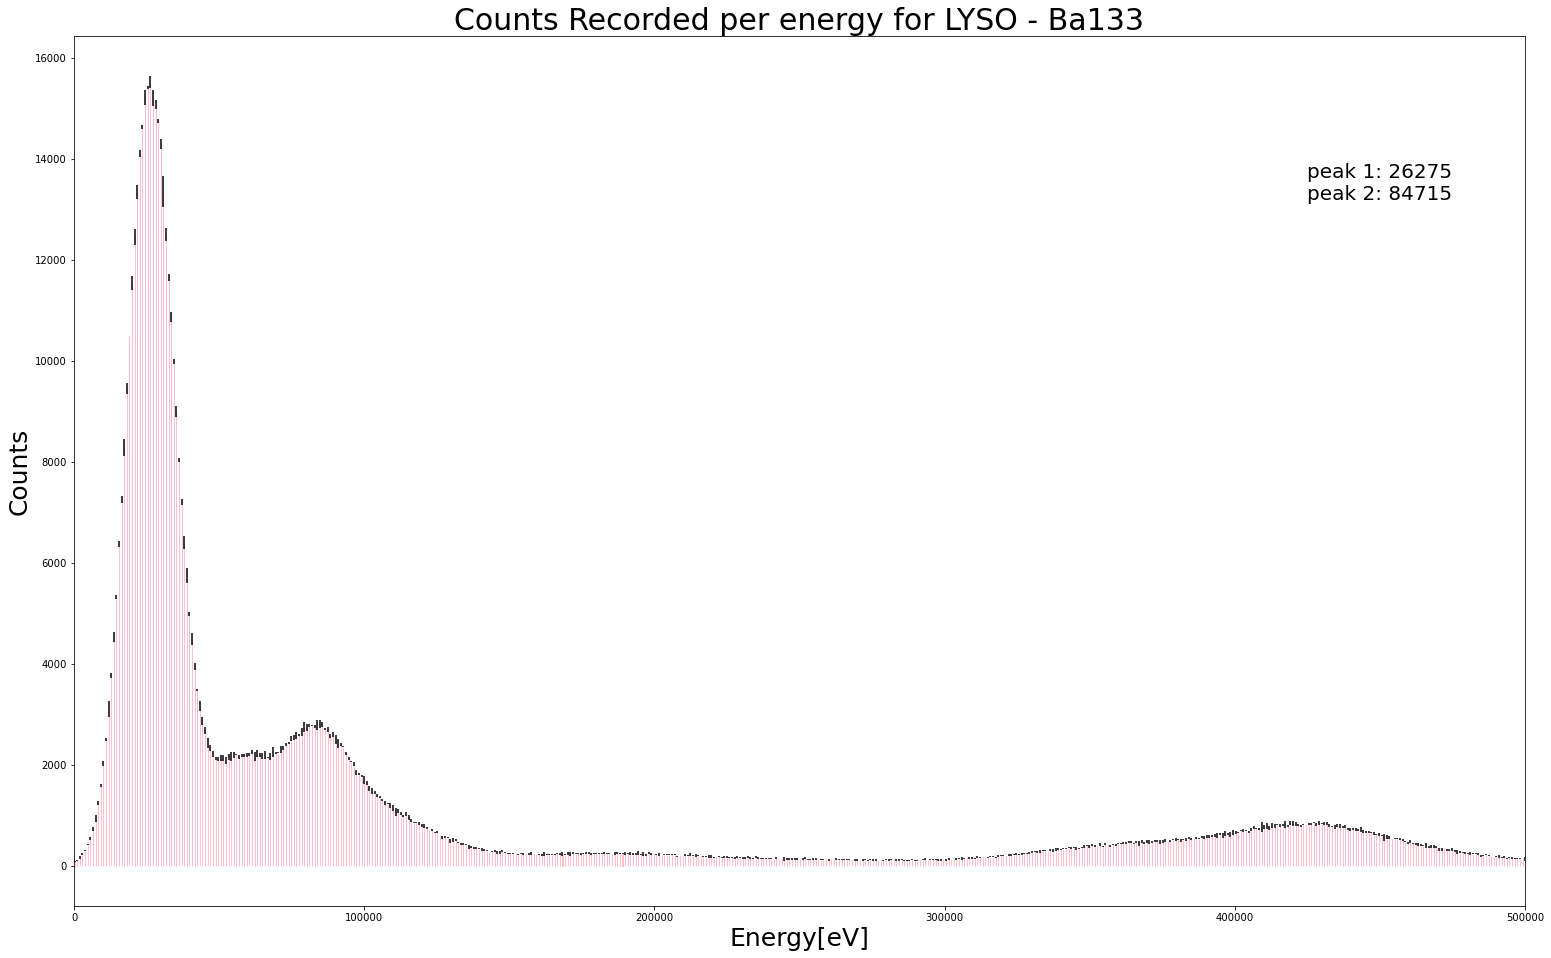

In [169]:
fig, ax = plt.subplots(figsize = (26,16))

ax.bar(x = energy, height = average, width = 0.8, ec = 'pink', yerr = error)
ax.set_xlim(xmin=x_min, xmax = x_max)

plt.xlabel('Energy[eV]', fontsize = 25)
plt.ylabel('Counts', fontsize = 25)
plt.title(f'Counts Recorded per energy for {crystal} - {source}', fontsize = 30)
plt.text(0.85*x_max, 
         np.max(average)*0.85, 
         f"peak 1: {peak1}\npeak 2: {peak2}", 
         dict(size=20)
        )

plt.savefig(f'Graphs_Energy/{crystal}_{source}.png')

In [199]:
def FWHM(x, y):
    half_max = np.max(dataframe)["average"] / 2
    d = np.sign(half_max - np.array(y[0:-1])) - np.sign(half_max - np.array(y[1:]))
    left_idx = np.where(d > 0)[0][0]
    print(f"Left index is: {left_idx}")
    right_idx = np.where(d < 0)[-1][0]
    print(f"Right index: {right_idx}")
    return x[right_idx] - x[left_idx] #return the difference (full width)


In [200]:
FWHM(energy, average)

Left index is: 68
Right index: 90


19779.69358846175

In [209]:
def vivelaresolution(dataframe, energy, average):
    er = FWHM(energy, average)/peak1
    
    return er

In [210]:
vivelaresolution(dataframe, energy, average)

Left index is: 68
Right index: 90


0.7527951889043482